# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [29]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

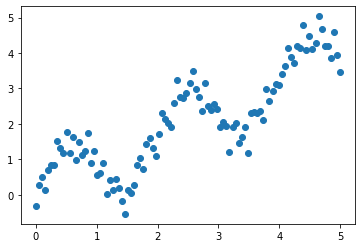

In [30]:
plt.scatter(x,y)

#### nonlinear

In [31]:
regr_lin = LinearRegression()

In [32]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [33]:
regr_lin.fit(X,y)

LinearRegression()

0.546340381343409


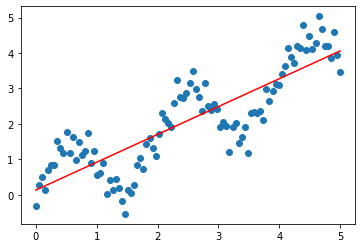

In [34]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [35]:
print(x.shape)

(100,)


In [36]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [37]:
regr_poly = LinearRegression()

In [38]:
regr_poly.fit(X_poly, y)

LinearRegression()

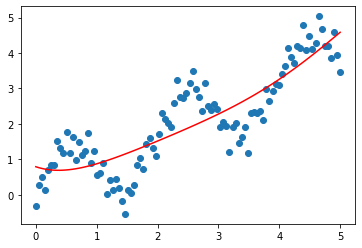

In [39]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [40]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-0.58377363  0.96477218 -0.35993373  0.06572338 -0.00431634]
interception:  0.7892122721476782


In [14]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([0.9245622 , 0.85542249, 0.79548783, 0.74420902, 0.70105699,
       0.66552246, 0.63711562, 0.61536578, 0.59982109, 0.59004814,
       0.58563168, 0.5861743 , 0.59129604, 0.60063413, 0.61384262,
       0.63059204, 0.65056913, 0.67347643, 0.69903201, 0.72696914,
       0.75703591, 0.78899495, 0.82262309, 0.857711  , 0.89406291,
       0.93149624, 0.9698413 , 1.00894092, 1.04865018, 1.08883602,
       1.12937696, 1.17016272, 1.21109394, 1.25208184, 1.29304784,
       1.33392332, 1.37464919, 1.41517566, 1.45546182, 1.49547539,
       1.53519232, 1.57459651, 1.61367946, 1.65243996, 1.69088372,
       1.72902307, 1.76687665, 1.80446903, 1.84183042, 1.87899631,
       1.9160072 , 1.95290818, 1.98974867, 2.02658209, 2.06346547,
       2.10045919, 2.13762661, 2.17503376, 2.21274899, 2.25084266,
       2.28938681, 2.32845481, 2.36812106, 2.40846063, 2.44954895,
       2.49146148, 2.53427338, 2.57805917, 2.6228924 , 2.66884535,
       2.71598866, 2.76439103, 2.81411887, 2.86523598, 2.91780

In [15]:
regr_poly.predict(X_poly)

array([0.9245622 , 0.85542249, 0.79548783, 0.74420902, 0.70105699,
       0.66552246, 0.63711562, 0.61536578, 0.59982109, 0.59004814,
       0.58563168, 0.5861743 , 0.59129604, 0.60063413, 0.61384262,
       0.63059204, 0.65056913, 0.67347643, 0.69903201, 0.72696914,
       0.75703591, 0.78899495, 0.82262309, 0.857711  , 0.89406291,
       0.93149624, 0.9698413 , 1.00894092, 1.04865018, 1.08883602,
       1.12937696, 1.17016272, 1.21109394, 1.25208184, 1.29304784,
       1.33392332, 1.37464919, 1.41517566, 1.45546182, 1.49547539,
       1.53519232, 1.57459651, 1.61367946, 1.65243996, 1.69088372,
       1.72902307, 1.76687665, 1.80446903, 1.84183042, 1.87899631,
       1.9160072 , 1.95290818, 1.98974867, 2.02658209, 2.06346547,
       2.10045919, 2.13762661, 2.17503376, 2.21274899, 2.25084266,
       2.28938681, 2.32845481, 2.36812106, 2.40846063, 2.44954895,
       2.49146148, 2.53427338, 2.57805917, 2.6228924 , 2.66884535,
       2.71598866, 2.76439103, 2.81411887, 2.86523598, 2.91780

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [16]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [17]:
sigma = 0.3

In [18]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [19]:
regr_rbf = LinearRegression()

In [20]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

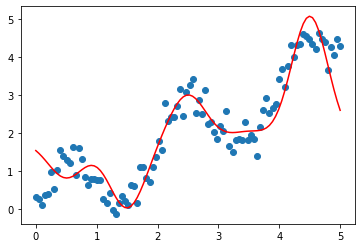

In [21]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [22]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-0.95168093 -1.74446718  1.22996897  0.2567023   3.29110825]
interception:  1.7788101355024488


#### Comparison

In [23]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

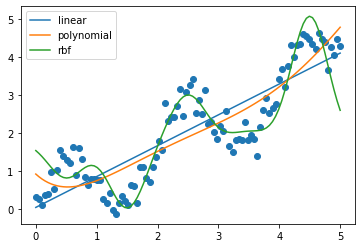

In [24]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [25]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.5095551420423147


In [26]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.4391986110179365


In [27]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.2710129662136329
